
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
    <li><a href="#q1">Research Question 1: What actors' films have grossed the most at the box office?</a></li>
    <li><a href="#q2">Research Question 2: Which actors' films have cost the most to make?</a></li>
    <li><a href="#q3">Research Question 3: Does a higher cost movie result in higher profits?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This investigation takes a closer look at a collection of 10,000 movies contained in The Movie Database (TMDb).  A close look will be taken at the value that individual actors might bring to a production by attempting to answer the questions: 
 <b>
 - What actors' films have grossed the most at the box office?
 - Which actors' films have cost the most to make?
 - Does a higher cost movie result in higher profits? </b>


In [26]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [27]:
# Load data and inspect
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [28]:
# Inspect dimensions
df.shape

(10866, 21)

<b>There are 10866 rows and 21 columns of data in this dataset</b>

In [29]:
# Inspect data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<b>The data types present are: integer, float, and "object" which are most likely strings</b>

In [30]:
# Look for columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [31]:
#Find out how many movies are missing 
sum(pd.isnull(df['cast']))

76

<b>It looks like the columns that have missing values are: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.  Only the cast column will be used in the analysis, so the 76 movies missing values for "cast" will be dropped during cleaning.</b>

In [32]:
# Check for duplicate entries
sum(df.duplicated())

1

<b>One entry has been duplicated and will need to be removed during cleaning.</b>

In [33]:
missing_revenue = (df['revenue_adj'] == 0).sum()
missing_budget = (df['budget_adj'] == 0).sum()

print("There are {} movies with no reported revenue and {} movies with no reported budget.".format(missing_revenue, missing_budget))

There are 6016 movies with no reported revenue and 5696 movies with no reported budget.


<b>Movies with no reported revenue or budget will not be counted in an actor's overall film total when calculating average totals.

### Data Cleaning 

- Remove duplicate entry

In [34]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

- Remove columns not needed for analysis

In [35]:
# Drop unnecessary columns
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'release_year'], axis='columns', inplace=True)

#Ensure changes were made properly
df.head(1)

,id,popularity,original_title,cast,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,5562,6.5,1.379999e+08,1.392446e+09


- Remove movies where no cast members are listed

In [36]:
#Drop null values for "cast"
df = df.dropna(subset=['cast'])

#Check that current number of rows shows that the 76 movies with null cast values and  
# 1 duplicate row have been removed from the original dataset (10866 - 77 = 10789)
df.shape

(10789, 8)

- Create a new dataframe with each actor in a movie on a seperate line

In [37]:
# Create new dataset with each actor listed on a separate line
df_expanded= df.assign(cast=df['cast'].str.split('|')).explode('cast')

#Rename "cast" column as "actor"
df_expanded.rename(columns={'cast':'actor'}, inplace=True)

#Ensure changes were made properly
df_expanded.head(1)          

,id,popularity,original_title,actor,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt,5562,6.5,1.379999e+08,1.392446e+09


- Create a profit column

In [38]:
df_expanded['profit'] = df_expanded['revenue_adj'] - df_expanded['budget_adj']

df_expanded.head(1)

,id,popularity,original_title,actor,vote_count,vote_average,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09


<a id='eda'></a>
## Exploratory Data Analysis

<b>For the following questions, the adjusted amounts will be used as opposed to the actual reported dollar amounts since it will give equal weight to those amounts and is not dependant on when the movie was made.

<a id='q1'></a>

### Research Question 1: What actors' films have grossed the most at the box office?

- First we will take a look at the range of all movie revenue

In [82]:
#Create a subset where all revenue is greater than zero
rev_above_zero = df[df['revenue_adj'] > 0]

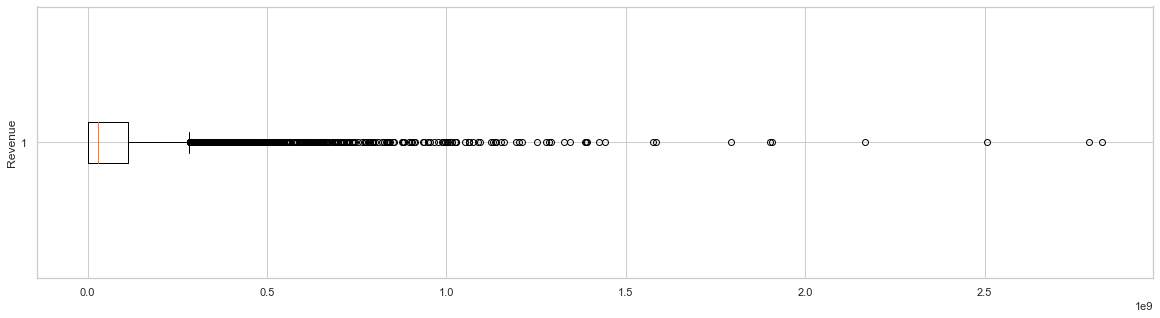

In [97]:
# plot boxplot
plt.figure(figsize=(20,5))
plt.boxplot(rev_above_zero['revenue_adj'], vert = False)
plt.ylabel("Revenue")
plt.show()

<b>It appears that there are too many outliers to determine what the normal revenue distribution should look like, but it looks like the range is from 300 million to 2.8 billion dollars.</b>

- Next we will take a look at each actor's total box office revenue for all movies in dataset

In [78]:
#Sum the adj_revenue for each actor
revenue_by_actor = df_expanded.groupby('actor').sum().revenue_adj

#Sort list to show the top 20 grossing actors
top_revenue_by_actor = revenue_by_actor.nlargest(20)
top_revenue_by_actor

actor
Harrison Ford        1.468348e+10
Tom Cruise           1.121280e+10
Tom Hanks            1.067239e+10
Emma Watson          8.806337e+09
Ian McKellen         8.671323e+09
Eddie Murphy         8.572390e+09
Johnny Depp          8.564524e+09
Daniel Radcliffe     8.515082e+09
Rupert Grint         8.358390e+09
Bruce Willis         8.253051e+09
Samuel L. Jackson    7.977077e+09
Cameron Diaz         7.929645e+09
Will Smith           7.775643e+09
Carrie Fisher        7.685248e+09
Brad Pitt            7.635642e+09
Ralph Fiennes        7.594945e+09
Robin Williams       7.555305e+09
Orlando Bloom        7.474890e+09
Sean Connery         7.466188e+09
Robert Downey Jr.    7.427453e+09
Name: revenue_adj, dtype: float64

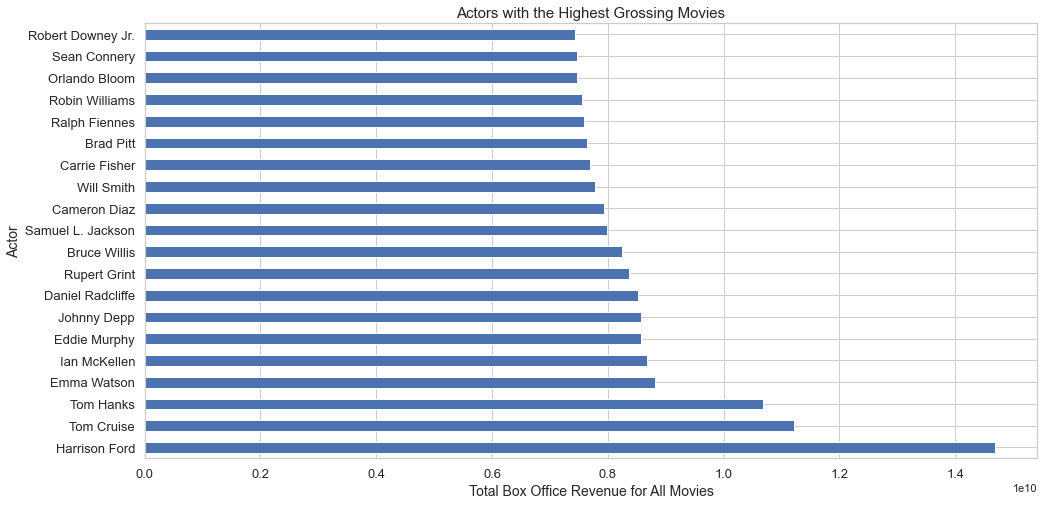

In [79]:
#Plot of the top 20 grossing actors
top_revenue_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Highest Grossing Movies",fontsize=15)
plt.xlabel('Total Box Office Revenue for All Movies',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

<b>We can see many "A-list" actors on this list, and it is no surprise that actors such as Harrison Ford, Tom Cruise, and Tom Hanks are the top three actors listed, and all three have been cast in many blockbuster films.</b>

- Now a look at who grosses the most on average

In [80]:
#Calculate average grossed per film based on the number of films (not counting films with no reported revenue)
films_by_actor = df_expanded[df_expanded['revenue_adj'] > 0].groupby('actor')['revenue_adj'].count()
average_revenue_by_actor = revenue_by_actor/films_by_actor

#Sort list to show the average top 20 grossing actors
highest_ravg_by_actor = average_revenue_by_actor.nlargest(20)
highest_ravg_by_actor

actor
Daisy Ridley              1.902723e+09
Robert MacNaughton        1.791694e+09
Ken Howard                1.583050e+09
Ben Wright                1.574815e+09
Betty Lou Gerson          1.574815e+09
J. Pat O'Malley           1.574815e+09
Martha Wentworth          1.574815e+09
Peter Cushing             1.416328e+09
Bob Peck                  1.388863e+09
Louis Prima               1.345551e+09
Sebastian Cabot           1.345551e+09
Anthony Daniels           1.339223e+09
Richard S. Castellano     1.277914e+09
Mark Hamill               1.233071e+09
Idina Menzel              1.192711e+09
Jonathan Groff            1.192711e+09
Santino Fontana           1.192711e+09
Jonathan Taylor Thomas    1.159592e+09
Eleanor Parker            1.129535e+09
Peggy Wood                1.129535e+09
Name: revenue_adj, dtype: float64

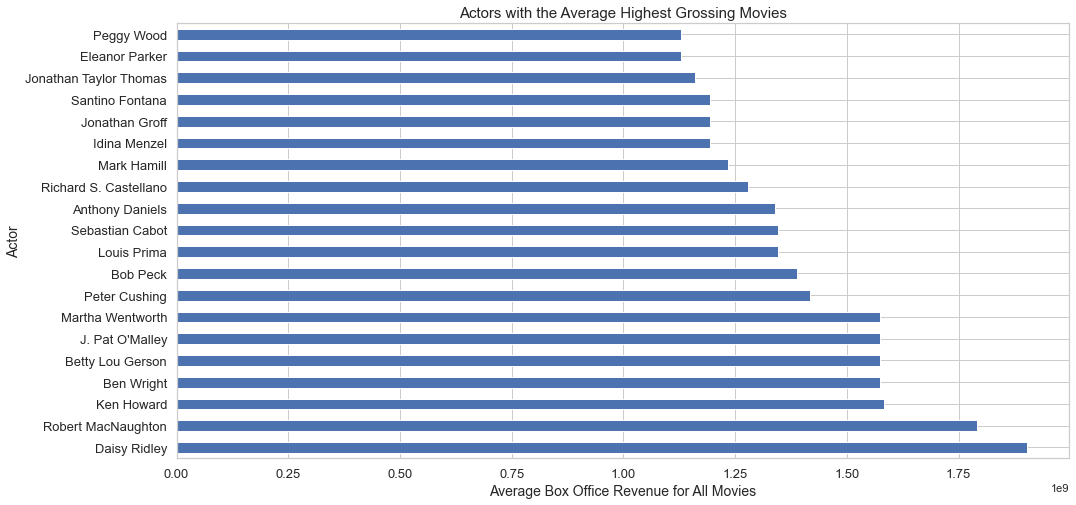

In [81]:
#Plot of the average top 20 grossing actors
highest_ravg_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Average Highest Grossing Movies",fontsize=15)
plt.xlabel('Average Box Office Revenue for All Movies',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

<b>This information is more surprising.  I see many Star Wars actors listed here, which makes me think that many of the actors on this list may have been in fewer movies, but that those movies were high in revenue over time.</b>

<a id='q2'></a>

### Research Question 2: Which actors' films have cost the most to make?

- First we will take a look at the range of all movie budgets

In [87]:
#Create a subset where all revenue is greater than zero
bgt_over_zero = df[df['budget_adj'] > 0]

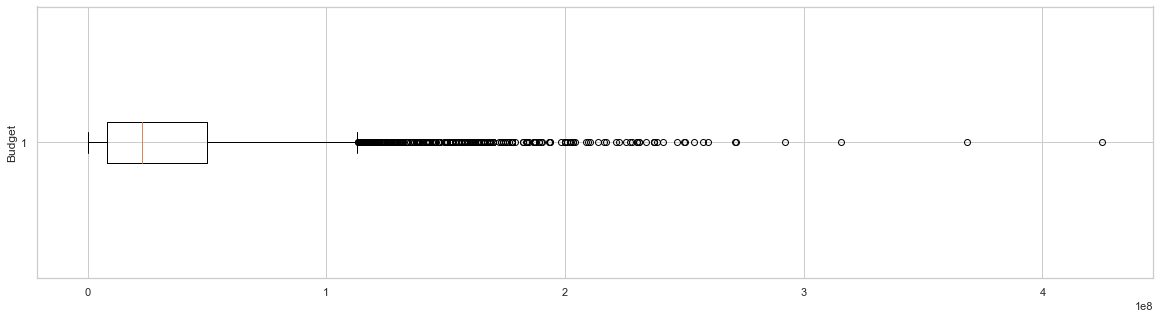

In [98]:
# plot boxplot
plt.figure(figsize=(20,5))
plt.boxplot(bgt_over_zero['budget_adj'], vert = False)
plt.ylabel("Budget")
plt.show()

<b>Again too many outliers to see a good distribution, but it appears that the budgets range from 120 million to 430 million dollars.</b>

- Next we will take a look at the overall cost for all movies by actor

In [99]:
#Sum the budget_adj for each actor
budget_by_actor = df_expanded.groupby('actor').sum().budget_adj

#Sort list to show the top 20 actors based on the amount spent on all movies
top_budget_by_actor = budget_by_actor.nlargest(20)
top_budget_by_actor

actor
Bruce Willis             3.352545e+09
Johnny Depp              3.279811e+09
Nicolas Cage             2.872865e+09
Robert De Niro           2.871290e+09
Samuel L. Jackson        2.865955e+09
Tom Cruise               2.813303e+09
Eddie Murphy             2.783234e+09
Harrison Ford            2.560277e+09
Brad Pitt                2.519644e+09
Arnold Schwarzenegger    2.415107e+09
Tom Hanks                2.355921e+09
Will Smith               2.328549e+09
Angelina Jolie           2.277462e+09
Sylvester Stallone       2.233235e+09
Gary Oldman              2.233113e+09
Matt Damon               2.228762e+09
Hugh Jackman             2.173286e+09
Robin Williams           2.124843e+09
Ian McKellen             2.075085e+09
Cameron Diaz             2.061835e+09
Name: budget_adj, dtype: float64

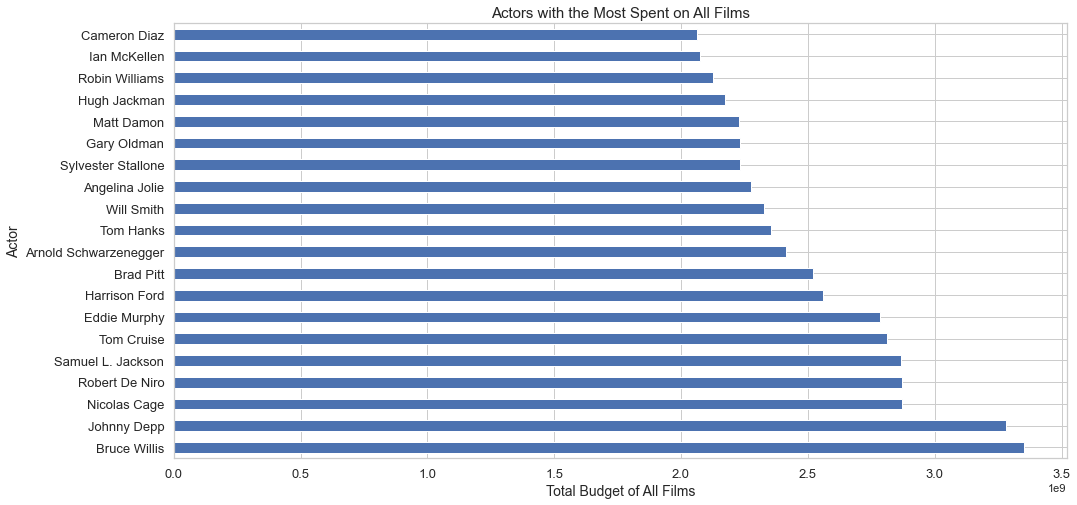

In [100]:
#Plot of the top 20 actors by total film cost
top_budget_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Most Spent on All Films",fontsize=15)
plt.xlabel('Total Budget of All Films',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

<b>As with total revenue, this list is populated by many "A-list" actors who have appeared in many blockbuster movies, which tend to be higher budget.</b>

- Now a look at the average cost per film for each actor

In [45]:
#Calculate average cost per film based on the number of films (not counting films with no reported budget)
films_by_actor = df_expanded[df_expanded['budget_adj'] > 0].groupby('actor')['budget_adj'].count()
average_budget_by_actor = budget_by_actor/films_by_actor

#Sort list to show the top 20 actors with highest cost per movie on average
highest_bavg_by_actor = average_budget_by_actor.nlargest(20)
highest_bavg_by_actor

actor
Jang Dong-gun       4.250000e+08
Ti Lung             4.250000e+08
Donna Murphy        2.600000e+08
Chaim Girafi        2.504192e+08
R. D. Call          2.504192e+08
Rick Aviles         2.504192e+08
Zitto Kazann        2.504192e+08
Ken Stott           2.321406e+08
Rosemary Harris     2.308891e+08
William Moseley     2.144292e+08
Clive Russell       2.094485e+08
Daniel Southern     2.094485e+08
Dennis StorhÃ¸i     2.094485e+08
Vladimir Kulich     2.094485e+08
Sage Ryan           2.032801e+08
Steve Valentine     2.032801e+08
Georgie Henley      1.946195e+08
Skandar Keynes      1.946195e+08
Abigail Hargrove    1.872067e+08
Joel Murray         1.872067e+08
Name: budget_adj, dtype: float64

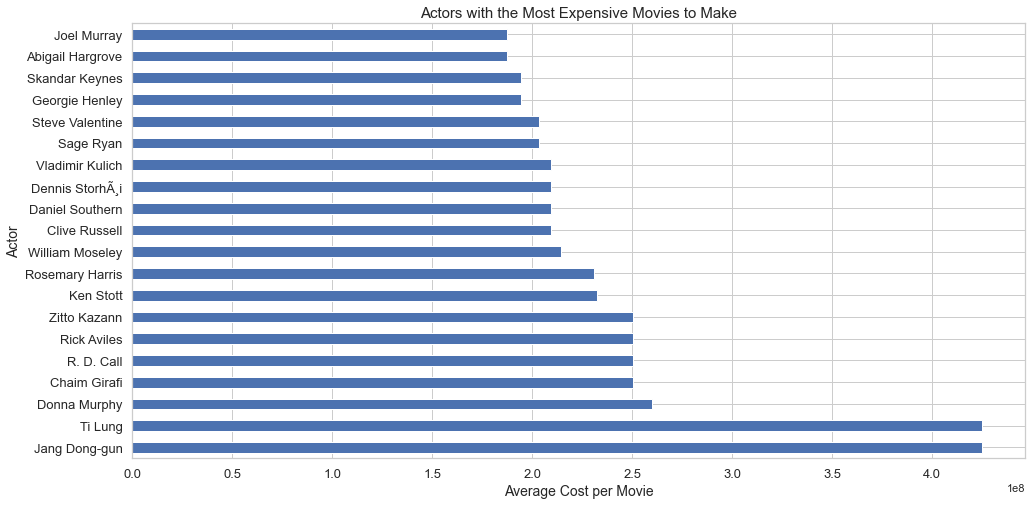

In [101]:
#Plot of the top 20 actors by film cost
highest_bavg_by_actor.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Actors with the Most Expensive Movies to Make",fontsize=15)
plt.xlabel('Average Cost per Movie',fontsize=14)
plt.ylabel('Actor',fontsize=14)
sns.set_style("whitegrid")

<b>I don't recognize many names on this list, so I am uncertain if this metric adds anything to the analysis.</b>

<a id='q3'></a>

### Research Question 3: Does a higher cost movie result in higher profits?

- First a look at the range of profits for all movies

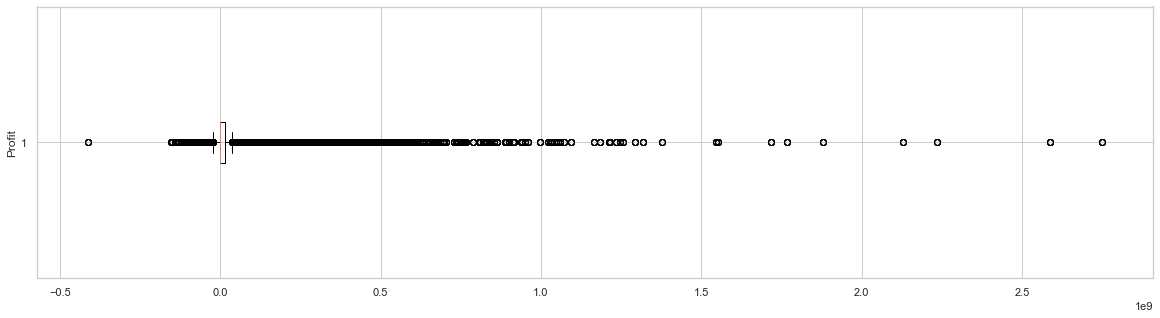

In [102]:
# plot boxplot
plt.figure(figsize=(20,5))
plt.boxplot(df_expanded['profit'], vert = False)
plt.ylabel("Profit")
plt.show()

<b>This boxplot is more interesting than those above.  We can see that the lower 25% of movies have actually lost money.  The range of profit is from approximately negative 40 million to 280 million dollars.</b>

- Next we will see if there is any correlation between how much a movie costs and how much it earns in profit

In [47]:
#Create subset of budget and profit by actor
actor_totals = df_expanded.groupby(by = ['actor'], as_index=False).agg({'budget_adj':'sum', 'profit':'sum'})

#Sort data by budget
highest_actor_totals = actor_totals.nlargest(100, 'budget_adj')
highest_actor_totals


,actor,budget_adj,profit
2508,Bruce Willis,3.352545e+09,4.900506e+09
9167,Johnny Depp,3.279811e+09,5.284713e+09
13621,Nicolas Cage,2.872865e+09,2.847799e+09
15340,Robert De Niro,2.871290e+09,3.743079e+09
16078,Samuel L. Jackson,2.865955e+09,5.111121e+09
...,...,...,...
3454,Christopher Walken,1.282782e+09,1.648178e+09
12628,Michael Douglas,1.276916e+09,3.127340e+09
1174,Anne Hathaway,1.273742e+09,4.386218e+09
3205,Chris Hemsworth,1.264480e+09,3.139742e+09


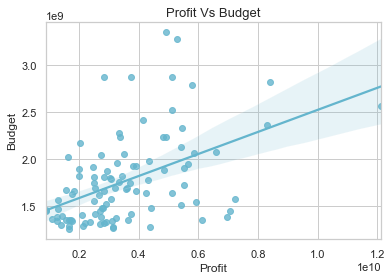

In [48]:
#Scatterplot of profit vs budget 

at_plot = sns.regplot(x=highest_actor_totals['profit'], y=highest_actor_totals['budget_adj'],color='c')
at_plot.set_title("Profit Vs Budget",fontsize=13)
at_plot.set_xlabel("Profit",fontsize=12)
at_plot.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

<b>It does appear that there may be some correlation between higher cost movies and returned profit as the graph trends upwards.</b>

- Next compare total profits to the average amount spent on a movie

In [49]:
#Get average budget by actor
total_budget_by_actor = df_expanded.groupby('actor').sum().budget_adj
films_by_actor = df_expanded[df_expanded['budget_adj'] > 0].groupby('actor')['budget_adj'].count()
average_budget_by_actor = total_budget_by_actor/films_by_actor

#Get average profit by actor
total_profit_by_actor = df_expanded.groupby('actor').sum().profit
films_by_actor = df_expanded[df_expanded['profit'] > 0].groupby('actor')['profit'].count()
average_profit_by_actor = total_profit_by_actor/films_by_actor
average_profit_by_actor.head()

#Combine the averaged amounts into a single dataset and delete rows with missing values
average_budget_and_profit = pd.concat([average_budget_by_actor, average_profit_by_actor], axis=1)
average_budget_and_profit.dropna(inplace = True)

#Sort list to show the top 20 actors based on the amount spent on all movies
top_average_budget = average_budget_and_profit.nlargest(20, 'budget_adj')
top_average_budget


,budget_adj,profit
actor,,
Donna Murphy,2.600000e+08,3.317949e+08
Chaim Girafi,2.504192e+08,1.276683e+08
R. D. Call,2.504192e+08,1.276683e+08
Rick Aviles,2.504192e+08,1.276683e+08
Zitto Kazann,2.504192e+08,1.276683e+08
Ken Stott,2.321406e+08,6.562828e+08
Rosemary Harris,2.308891e+08,6.739264e+08
William Moseley,2.144292e+08,4.161247e+08
Sage Ryan,2.032801e+08,1.272878e+08


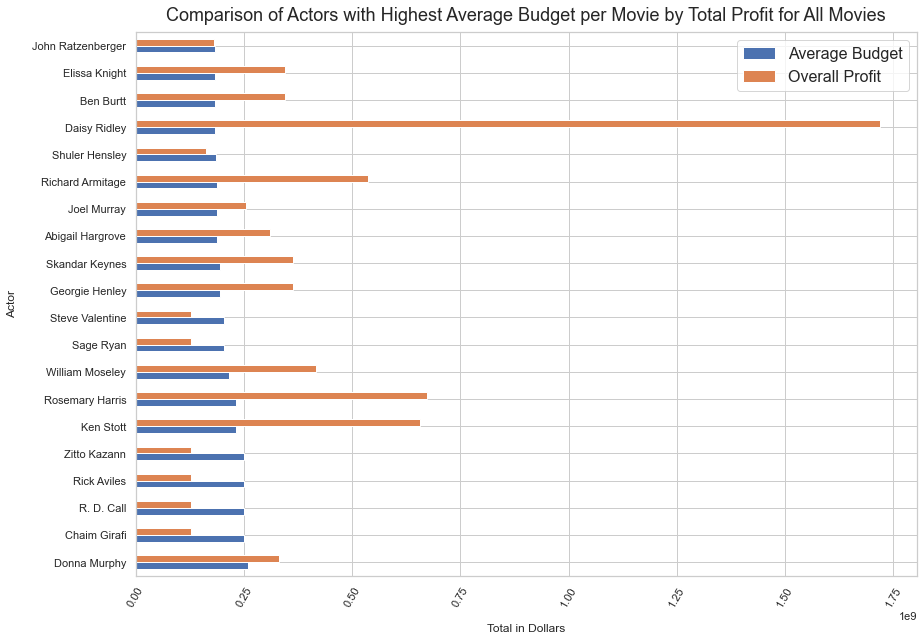

In [50]:
#Plot the actors with the highest average profit and compare it to the average budget
top_average_budget.plot(kind='barh', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Comparison of Actors with Highest Average Budget per Movie by Total Profit for All Movies", fontsize=18, y=1.01)
plt.xlabel("Total in Dollars", labelpad=15)
plt.ylabel("Actor", labelpad=15)
plt.legend(["Average Budget", "Overall Profit"], fontsize=16);


<b>I do not see value in the data presented here as with the above questions where an average of totals is used.  This does not appear to be a good metric of whether or not higher average profits mean that the movies cost more to make.</b>

<a id='conclusions'></a>
## Conclusions

  For question one, the actors with the overall highest grossing movies were no surprise, as the top 20 have been been featured in many of the major blockbuster movies of the past 30 years.  The average highest grossing actors list contained many unrecognizable names or newcomers, which was a bit surprising and making it appear to be a less dependable measurement of how lucrative it may be to cast those particular actors.
  
  In question two, again the overall list of total budget of all actors in the dataset contained names of actors who were more likely to be cast in blockbuster movies, which typically are made at a high cost.  Again using the average budget for all actors gave surprising results with many unknown names on the list.
  
  For the final question, it appears that there is a positive correlation showing that a higher cost movie has more profit potential.  Again the use of average amounts gives undesirable results.
  
  This analysis took a look at only one small aspect that the dataset had to offer.  Some value may have been lost with the elimination of data that contained null values, and could have changed the results if that data had been included.  